In [104]:
from qiskit import *

IBMQ.save_account(open("../ibmapi.txt","r").read(), overwrite=True)
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-01-11 12:49:46,406: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [105]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [106]:
provider = IBMQ.get_provider("ibm-q")
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [107]:
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
        
    print(f"{backend.name()}: {backend.status().pending_jobs} : {qubit_count}")

ibmq_qasm_simulator: 1 : simulated
ibmq_lima: 0 : 5
ibmq_belem: 28 : 5
ibmq_quito: 11 : 5
simulator_statevector: 1 : simulated
simulator_mps: 1 : simulated
simulator_extended_stabilizer: 1 : simulated
simulator_stabilizer: 1 : simulated
ibmq_manila: 0 : 5
ibm_nairobi: 34 : 7
ibm_oslo: 9 : 7


In [108]:
provider = IBMQ.get_provider("ibm-q")
quantum_computer = provider.get_backend("ibmq_lima")

In [109]:
import qiskit.tools.jupyter
from qiskit.tools.monitor import job_monitor
%qiskit_job_watcher

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])

job = execute(circuit, backend=quantum_computer)
job_monitor(job)

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

Job Status: job has successfully run


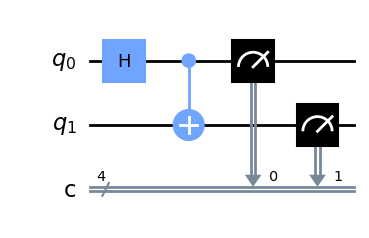

In [110]:
%matplotlib inline
circuit.draw(output="mpl")

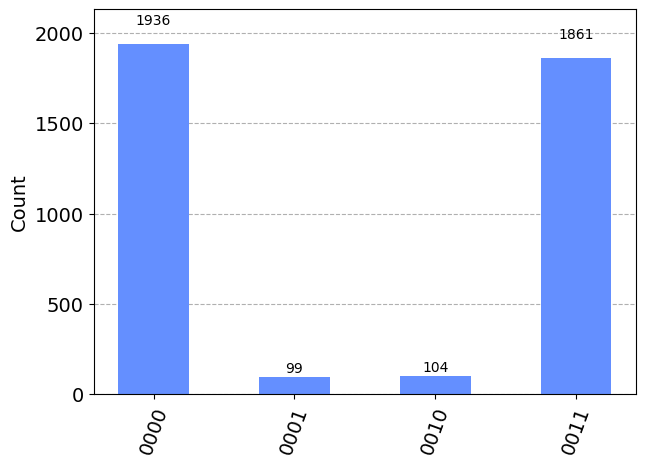

In [111]:
from qiskit.visualization import plot_histogram
quantum_result = job.result()
plot_histogram(quantum_result.get_counts(circuit))

In [112]:
%qiskit_disable_job_watcher